In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!mkdir my_projects
%cd my_projects

/content/my_projects


In [3]:
!git clone https://github.com/YeoniH/geometry-driven-hyperuniformity.git

Cloning into 'geometry-driven-hyperuniformity'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 11), reused 15 (delta 5), pack-reused 0
Receiving objects: 100% (25/25), 14.35 KiB | 14.35 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


In [5]:
!pip install freud-analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.8 MB/s eta 0:00:00


In [6]:
!ls
%cd geometry-driven-hyperuniformity

geometry-driven-hyperuniformity
/content/my_projects/geometry-driven-hyperuniformity


In [7]:
from os import system
import numpy as np

def generate_2d_poisson_pp(density, L):
  """
  Args:
    density: rate, i.e., number of points per unit volume
    L: side length of the square simulation box
  """
  mean = density * (L**2)
  N = np.random.poisson(mean)

  X = np.random.uniform(-L/2, L/2, N)
  Y = np.random.uniform(-L/2, L/2, N)

  coord = np.zeros((N, 3))
  for i in range(N):
    coord[i] = [X[i], Y[i], 0.0]
  return coord

In [15]:
L = 10
init_points = generate_2d_poisson_pp(density=1, L=L)
num_points = len(init_points)

In [16]:
print(num_points)

128


In [17]:
from Analysis import PeriodicVoro as PV
from tqdm import tqdm

dim = 2
num_iter = 1000   # number of iterations steps of the Lloyd's algorithm

points = init_points
for t in tqdm(range(num_iter+1)):
  config = PV(dim=dim, points=points, L=L, step=t)
  points = config.update_by_lloyd_algorithm()
final_points = points

100%|██████████| 1001/1001 [00:08<00:00, 115.00it/s]


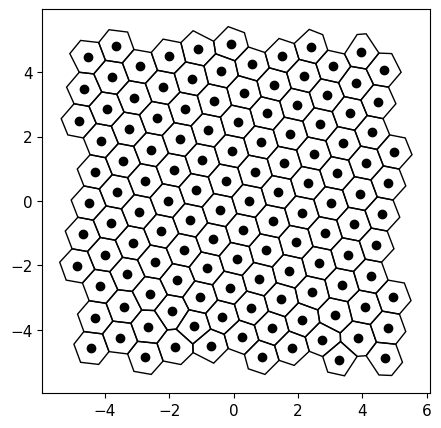

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.tick_params(axis='both', labelsize=11)
ax.set_aspect('equal', 'box')
ax.scatter(final_points[:, 0], final_points[:, 1], color="k")

final_config = PV(dim, final_points, L, num_iter)
for idx, polytope in enumerate(final_config.voro.polytopes):
    facecolor = "None"
    ax.fill(*zip(*polytope[:, :2]), facecolor=facecolor, edgecolor="k", linewidth=1.)
plt.show()

In [14]:
final_config.compute_correlation_function()

array([[ 9.95024890e-02,  0.00000000e+00],
       [ 2.98507452e-01,  0.00000000e+00],
       [ 4.97512430e-01,  0.00000000e+00],
       [ 6.96517408e-01,  0.00000000e+00],
       [ 8.95522416e-01,  2.85301762e-01],
       [ 1.09452736e+00,  6.79014049e-02],
       [ 1.29353237e+00,  1.03928957e-01],
       [ 1.49253726e+00,  0.00000000e+00],
       [ 1.69154239e+00,  1.22128397e-01],
       [ 1.89054728e+00,  3.05344905e-02],
       [ 2.08955240e+00,  5.30339109e-02],
       [ 2.28855705e+00,  2.22049305e-02],
       [ 2.48756218e+00, -1.25071102e-01],
       [ 2.68656731e+00,  4.03074013e-02],
       [ 2.88557220e+00,  1.38912599e-02],
       [ 3.08457708e+00,  2.17733617e-02],
       [ 3.28358221e+00, -4.12881046e-04],
       [ 3.48258710e+00, -1.78597292e-02],
       [ 3.68159199e+00,  1.20020896e-03],
       [ 3.88059711e+00, -2.03242444e-03],
       [ 4.07960224e+00,  6.85050673e-03],
       [ 4.27860689e+00, -3.00887232e-02],
       [ 4.47761202e+00, -1.60265990e-02],
       [ 4.